# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

In [2]:
import requests
import json


# Load the data

In [3]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [4]:
res = json.loads(r.content)

In [5]:
df = pd.DataFrame(res['result']['records'])

In [6]:
df.to_csv('flight_proj.csv', index=False)   # Saving the original DF

## display the first rows 

In [7]:
df.head()

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,EK,2370,EMIRATES,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,49-55,B,DEPARTED,המריאה
1,2,FZ,1550,FLYDUBAI,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,49-55,B,DEPARTED,המריאה
2,3,FR,1842,RYANAIR,2024-02-12T11:20:00,2024-02-12T11:23:00,A,FKB,BADEN BADEN,באדן באדן,BADEN BADEN,גרמניה,GERMANY,3,None,None,LANDED,נחתה
3,4,A4,5026,AZIMUTH AIRLINES,2024-02-12T11:05:00,2024-02-12T11:31:00,D,AER,SOCHI,סוצ'י,SOCHI,רוסיה,RUSSIAN FEDERATION,3,39-41,B,DEPARTED,המריאה
4,5,IZ,413,ARKIA ISRAELI AIRLINES,2024-02-12T11:10:00,2024-02-12T11:34:00,D,BUS,BATUMI,בטומי,BATUMI,גיאורגיה,GEORGIA,3,60-64,C,DEPARTED,המריאה


### display the last 10 rows - What's wrong? 

In [8]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
1211,1212,AM,7868,AERO MEXICO,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,NOT FINAL,לא סופי
1212,1213,AR,7852,AEROLINEAS ARGENTINAS S.A.,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,NOT FINAL,לא סופי
1213,1214,B6,6450,JETBLUE AIRWAYS CORPORATION,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,NOT FINAL,לא סופי
1214,1215,DL,7425,DELTA AIRLINES,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,NOT FINAL,לא סופי
1215,1216,EK,2450,EMIRATES,2024-02-16T10:20:00,2024-02-16T10:20:00,A,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,NOT FINAL,לא סופי
1216,1217,FZ,1081,FLYDUBAI,2024-02-16T10:20:00,2024-02-16T10:20:00,A,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,None,None,NOT FINAL,לא סופי
1217,1218,LY,002,EL AL ISRAEL AIRLINES,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,None,None,NOT FINAL,לא סופי
1218,1219,LY,2360,EL AL ISRAEL AIRLINES,2024-02-16T10:20:00,2024-02-16T10:20:00,A,BUD,BUDAPEST,בודפשט,BUDAPEST,הונגריה,HUNGARY,3,None,None,NOT FINAL,לא סופי
1219,1220,IZ,802,ARKIA ISRAELI AIRLINES,2024-02-16T10:25:00,2024-02-16T10:25:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,None,None,NOT FINAL,לא סופי
1220,1221,FR,7161,RYANAIR,2024-02-16T10:30:00,2024-02-16T10:30:00,A,VIE,VIENNA,וינה,VIENNA,אוסטריה,AUSTRIA,3,None,None,NOT FINAL,לא סופי


# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [9]:
print('Column    | NaN Percents')
print('------------------------')
for c in df.columns:
    total_count = df[c].shape[0]
    null_count = df[c].isna().sum()
    null_perc = (null_count/total_count*100).round(1)
    print('{:<13} {:>4} %'.format(c, null_perc))

Column    | NaN Percents
------------------------
_id            0.0 %
CHOPER         0.0 %
CHFLTN         0.0 %
CHOPERD        0.0 %
CHSTOL         0.0 %
CHPTOL         0.0 %
CHAORD         0.0 %
CHLOC1         0.0 %
CHLOC1D        0.0 %
CHLOC1TH       0.0 %
CHLOC1T        0.0 %
CHLOC1CH       0.0 %
CHLOCCT        0.0 %
CHTERM         0.0 %
CHCINT        55.0 %
CHCKZN        55.0 %
CHRMINE        0.0 %
CHRMINH        0.0 %


drop the empty rows  

In [10]:
df.dropna(inplace=True)

format the current date with underscore separation (%d_%m_%y)

In [11]:
today_date = pd.Timestamp.today().strftime('%d_%m_%Y')
today_date

'13_02_2024'

Drop the _id column 

In [12]:
df.drop(columns='_id', inplace=True)

save the raw data (add the current date to the file name) 

In [13]:
df.to_csv(f'clean_data_{today_date}.csv')

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [14]:
airlines2 = df[['CHOPER','CHOPERD']].drop_duplicates()
airlines2

,CHOPER,CHOPERD
0,EK,EMIRATES
1,FZ,FLYDUBAI
3,A4,AZIMUTH AIRLINES
4,IZ,ARKIA ISRAELI AIRLINES
9,LY,EL AL ISRAEL AIRLINES
10,AA,AMERICAN AIRLINES
11,AM,AERO MEXICO
13,SK,SAS
16,6H,ISRAIR AIRLINES
18,HY,UZBEKISTAN AIR


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [15]:
airlines = pd.read_csv('airlines.csv')
airlines_full_list = pd.concat([airlines, airlines2]).drop_duplicates()
airlines_full_list.to_csv('airlines.csv')

Drop the Airline name column 

In [16]:
df.drop(columns=['CHOPER','CHOPERD'], inplace=True)

Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [17]:
airports2 = df[['CHLOC1','CHLOC1D']].drop_duplicates()
airports2

,CHLOC1,CHLOC1D
0,DXB,DUBAI
3,AER,SOCHI
4,BUS,BATUMI
9,DME,MOSCOW-DOMODEDOVO
10,LHR,LONDON - HEATHROW
16,ETM,RAMON
18,TAS,TASHKENT
23,FKB,BADEN BADEN
24,LCA,LARNACA
30,JFK,NEW YORK - J.F.KENNEDY


In [18]:
airports = pd.read_csv('airports.csv')
airports_full_list = pd.concat([airports,airports2]).drop_duplicates()
airports_full_list.to_csv('airports.csv')

In [19]:
df.drop(columns=['CHLOC1','CHLOC1D'], inplace=True)

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [20]:
df.drop(columns=['CHLOC1TH','CHLOC1CH','CHRMINH'], inplace=True)

In [21]:
df.head()

,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,2370,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DUBAI,UNITED ARAB EMIRATES,3,49-55,B,DEPARTED
1,1550,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DUBAI,UNITED ARAB EMIRATES,3,49-55,B,DEPARTED
3,5026,2024-02-12T11:05:00,2024-02-12T11:31:00,D,SOCHI,RUSSIAN FEDERATION,3,39-41,B,DEPARTED
4,413,2024-02-12T11:10:00,2024-02-12T11:34:00,D,BATUMI,GEORGIA,3,60-64,C,DEPARTED
9,613,2024-02-12T11:45:00,2024-02-12T12:08:00,D,MOSCOW,RUSSIAN FEDERATION,3,78-99,D,DEPARTED


### rename the columns 

In [2]:
# Using the original DF and match it with final.csv file (cleaning and renaming columns)
df = pd.read_csv('flight_proj.csv')

# Drop columns
df.drop(columns=['_id',
                'CHOPERD',
                'CHLOC1D',
                'CHLOC1TH',
                'CHLOC1CH',
                'CHCINT',
                'CHCKZN',
                'CHRMINH'],
                inplace=True)

df.rename(columns={'CHOPER':'Airline',
                   'CHFLTN':'FlightNum',
                   'CHSTOL':'PlanTime',
                   'CHPTOL':'ActualTime',
                   'CHAORD':'Direction',
                   'CHLOC1':'Airport',
                   'CHLOC1T':'City', 
                   'CHLOCCT':'Country',
                   'CHTERM':'Terminal',
                   'CHRMINE':'Status'},
                    inplace=True)

In [3]:
df

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,EK,2370,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,DEPARTED
1,FZ,1550,2024-02-12T10:10:00,2024-02-12T11:03:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,DEPARTED
2,FR,1842,2024-02-12T11:20:00,2024-02-12T11:23:00,A,FKB,BADEN BADEN,GERMANY,3,LANDED
3,A4,5026,2024-02-12T11:05:00,2024-02-12T11:31:00,D,AER,SOCHI,RUSSIAN FEDERATION,3,DEPARTED
4,IZ,413,2024-02-12T11:10:00,2024-02-12T11:34:00,D,BUS,BATUMI,GEORGIA,3,DEPARTED
...,...,...,...,...,...,...,...,...,...,...
1216,FZ,1081,2024-02-16T10:20:00,2024-02-16T10:20:00,A,DXB,DUBAI,UNITED ARAB EMIRATES,3,NOT FINAL
1217,LY,2,2024-02-16T10:20:00,2024-02-16T10:20:00,A,JFK,NEW YORK,UNITED STATES,3,NOT FINAL
1218,LY,2360,2024-02-16T10:20:00,2024-02-16T10:20:00,A,BUD,BUDAPEST,HUNGARY,3,NOT FINAL
1219,IZ,802,2024-02-16T10:25:00,2024-02-16T10:25:00,A,ETM,RAMON,ISRAEL,3,NOT FINAL


Change the PlanTime and ActualTime columns type to np.datetime64

In [4]:
df['PlanTime'] = pd.to_datetime(df['PlanTime'])
df['ActualTime'] = pd.to_datetime(df['ActualTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     1221 non-null   object        
 1   FlightNum   1221 non-null   int64         
 2   PlanTime    1221 non-null   datetime64[ns]
 3   ActualTime  1221 non-null   datetime64[ns]
 4   Direction   1221 non-null   object        
 5   Airport     1221 non-null   object        
 6   City        1221 non-null   object        
 7   Country     1221 non-null   object        
 8   Terminal    1221 non-null   int64         
 9   Status      1221 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 95.5+ KB


Save the clean data 

In [5]:
df.to_csv('flights_new.csv', index=False)

update the file final.csv with departed, landed and canceled flights only

In [6]:
final = pd.read_csv('final.csv')
final['PlanTime'] = pd.to_datetime(final['PlanTime'])     #Changing PlanTime and ActualTime to datetime type (they're object type)
final['ActualTime'] = pd.to_datetime(final['ActualTime'])

# Filtering the df and updating final df
final_new = df[df['Status'].isin(['DEPARTED','LANDED','CANCELED'])]  
final = pd.concat([final, final_new])

final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 958 entries, 0 to 795
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     958 non-null    object        
 1   FlightNum   958 non-null    object        
 2   PlanTime    958 non-null    datetime64[ns]
 3   ActualTime  958 non-null    datetime64[ns]
 4   Direction   958 non-null    object        
 5   Airport     958 non-null    object        
 6   City        958 non-null    object        
 7   Country     958 non-null    object        
 8   Terminal    958 non-null    int64         
 9   Status      958 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 82.3+ KB


Add a new column for total delay in minutes

In [7]:
final['TimeDiff'] = (final['ActualTime']-final['PlanTime']).dt.total_seconds()/60

final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TimeDiff
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED,64.0
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,-10.0
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,-10.0
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,38.0
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,44.0


In [8]:
# Saving the updated DF
final.to_csv('final_new.csv', index=False)

# Analyze the data

In [3]:
# Loading the updated DF
final = pd.read_csv('final_new.csv')
final.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,TimeDiff
0,LY,842,2022-03-07 16:00:00,2022-03-07 17:04:00,A,LGG,LIEGE,BELGIUM,3,LANDED,64.0
1,AA,146,2022-03-07 17:15:00,2022-03-07 17:05:00,A,JFK,NEW YORK,UNITED STATES,3,LANDED,-10.0
2,USF,RCH18,2022-03-07 17:15:00,2022-03-07 17:05:00,D,RMS,RAMSTEIN,GERMANY,3,CANCELED,-10.0
3,AHS,N120L,2022-03-07 16:30:00,2022-03-07 17:08:00,D,TEB,TETERBORO,UNITED STATES,3,DEPARTED,38.0
4,LH,687,2022-03-07 16:25:00,2022-03-07 17:09:00,D,FRA,FRANKFURT,GERMANY,3,DEPARTED,44.0


What is the average delay for departed flights

In [6]:
MeanTime = final[final['Status']=='DEPARTED']['TimeDiff'].mean().round()
print(f'The departed mean time delay is {MeanTime} minutes')

The departed mean time delay is 21.0 minutes


### Display total delay distribution 

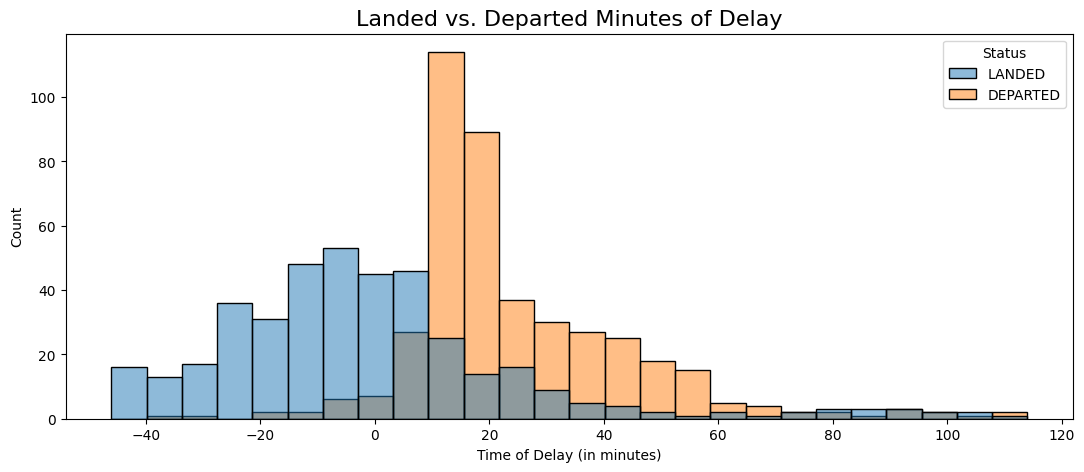

In [5]:
lower_edge = final.quantile(0.02, numeric_only=True)['TimeDiff']  # Buttom 2% values
top_edge = final.quantile(0.98, numeric_only=True)['TimeDiff']   # Top 2% values

mask1 = final.Status != 'CANCELED' 
mask2 = final.TimeDiff.between(lower_edge, top_edge)

# Filtering out canceled flights and extreme 2% values of TimeDiff
dep_land = final[(mask1) & (mask2)]

plt.figure(figsize=(13,5))
sb.histplot(data=dep_land, x='TimeDiff', hue='Status' )
plt.title('Landed vs. Departed Minutes of Delay', size=16)
plt.xlabel('Time of Delay (in minutes)')
plt.ylabel('Count')
plt.show()

### Top 10 Active Airlines:

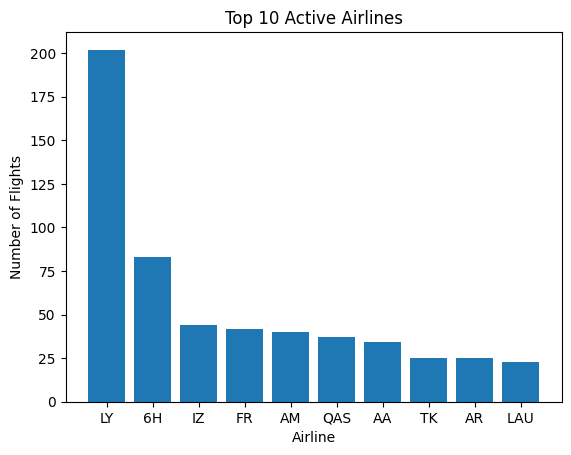

In [6]:
top10_airlines = final.Airline.value_counts().nlargest(10).reset_index()

plt.figure()
plt.bar(top10_airlines['Airline'], top10_airlines['count'])
plt.title('Top 10 Active Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.show()

### Canceled flights

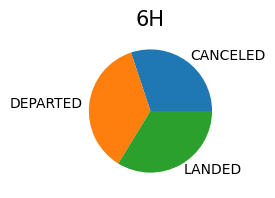

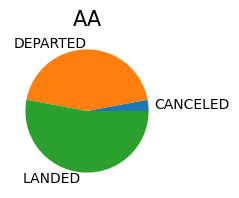

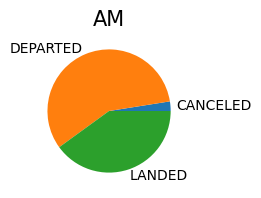

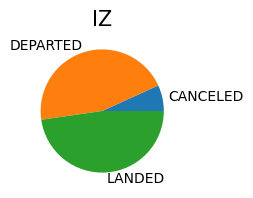

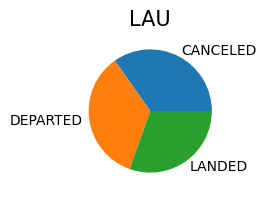

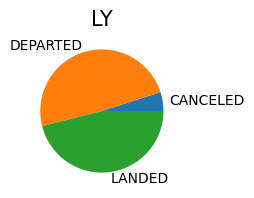

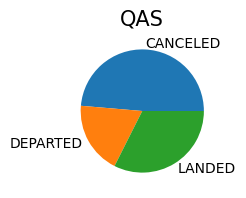

In [7]:
mask = final['Airline'].isin(top10_airlines['Airline'])  
final_top10 = final[mask]   # Filter the flights of Top 10 airlines

top10_status = final_top10.groupby(['Airline','Status']).size().reset_index()   # Count the status flights per airline
top10_pivot = top10_status.pivot_table(index = 'Status', columns='Airline', values=0, fill_value=0)    # Arrange the data in pivot table

# Create pie chart for each airline with canceled flights:
for i in top10_pivot.columns:
    if top10_pivot[i]['CANCELED']>0:
        plt.figure(figsize=(2,2))
        plt.pie(top10_pivot[i],
                labels=top10_pivot.index)
        plt.title(i, size=15)
        plt.show()

QAS (private flights service) - almost 50% of their flights were canceled, 


6H (Israir) and LAU (private flights service) - 30% of their flights were canceled

### Top 10 airlines- Landing delay time

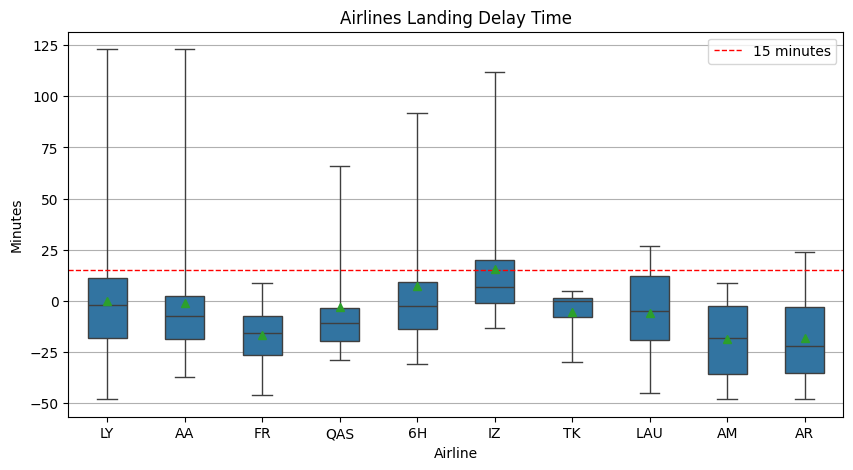

In [15]:
lower_edge = final_top10.quantile(0.02, numeric_only=True)['TimeDiff']
top_edge = final_top10.quantile(0.98, numeric_only=True)['TimeDiff']

mask1 = final_top10.Status == 'LANDED' 
mask2 = final_top10.TimeDiff.between(lower_edge, top_edge)  

final_clean = final_top10[(mask1) & (mask2)]

plt.figure(figsize=(10,5))
sb.boxplot(data=final_clean,
           x='Airline', 
           y='TimeDiff', 
           width=0.5, 
           whis=(0,100),
           showmeans=True)
plt.grid(axis='y')
plt.axhline(15,
            color='red', 
            linestyle='dashed', 
            linewidth=1, 
            label='15 minutes')
plt.title('Airlines Landing Delay Time')
plt.ylabel('Minutes')
plt.legend(loc='best')
plt.show()

* The FAA considers a flight to be delayed when it is 15 minutes later than its scheduled time (Wikipedia - "Flight cancellation and delay")

IZ (Arkia) have mean time of 15 minutes delay, All the rest have their mean arrival time under 15 minutes delay

### Arrival delay time from Top 10 airports

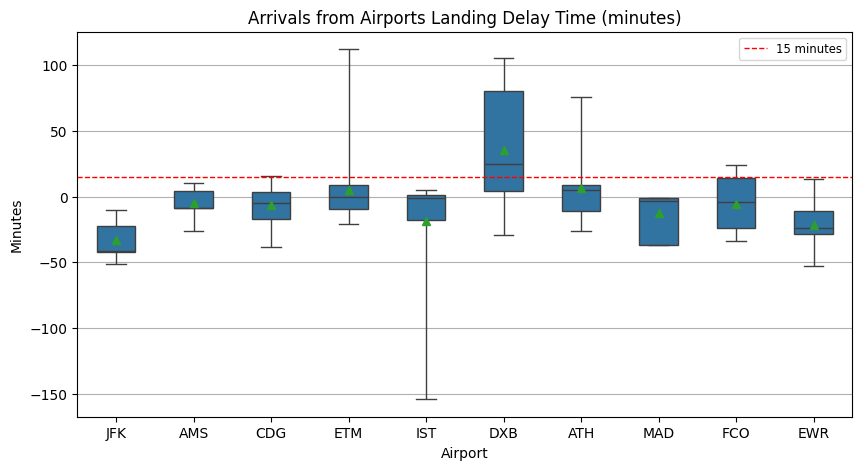

In [10]:
mask = final.Status=='LANDED'   # mask for landed flights only

top10_ap = final[mask]['Airport'].value_counts().nlargest(10).reset_index()  # Top 10 Airports of landed flight 
land_ap = final[(mask) & (final.Airport.isin(top10_ap.Airport))]    # Landed flights from Top 10 Airports

plt.figure(figsize=(10,5))
sb.boxplot(data=land_ap,
           x='Airport', 
           y='TimeDiff',
           width=0.5, 
           whis=(0,100),
           showmeans=True)
plt.grid(axis='y')
plt.axhline(15, 
            color='red', 
            linestyle='dashed', 
            linewidth=1, 
            label='15 minutes')
plt.title('Arrivals from Airports Landing Delay Time (minutes)')
plt.ylabel('Minutes')
plt.legend(loc='best', fontsize='small')
plt.show()

Flights arriving from DXB (Dubai) are usually arriving in delay (around 30 minutes), flights from the rest of the airports are in time (flights from Istanbul and US airports - JFK and EWR arrives early)